In [1]:
import pandas as pd
import os

In [2]:
os.chdir('..')

In [3]:
os.chdir('data/raw/food_access_file')

In [4]:
# Get Food Access Research Atlas for 2019

FARA_main = pd.read_csv('Food_Access_Research_Atlas.csv')

In [5]:
'''
Will not use this because this only applies to the FoodAccessResearchAtlasData2019.xlsx file

# Access different sheets of the Excel file
FARA_variables = pd.read_excel(FARA, 'Variable Lookup', header=[0])
FARA_main = pd.read_excel(FARA, 'Food Access Research Atlas', header=[0])
'''

"\nWill not use this because this only applies to the FoodAccessResearchAtlasData2019.xlsx file\n\n# Access different sheets of the Excel file\nFARA_variables = pd.read_excel(FARA, 'Variable Lookup', header=[0])\nFARA_main = pd.read_excel(FARA, 'Food Access Research Atlas', header=[0])\n"

In [6]:
'''
Will not use this because this only applies to the FoodAccessResearchAtlasData2019.xlsx file

pd.set_option('display.max_rows', FARA_variables.shape[0])
pd.set_option('display.max_colwidth', None)
FARA_variables
'''

"\nWill not use this because this only applies to the FoodAccessResearchAtlasData2019.xlsx file\n\npd.set_option('display.max_rows', FARA_variables.shape[0])\npd.set_option('display.max_colwidth', None)\nFARA_variables\n"

In [7]:
FARA_main.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.00,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.34,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.00,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.00,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.68,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0


In [8]:
FARA_main.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Data columns (total 147 columns):
 #   Column                Dtype  
---  ------                -----  
 0   CensusTract           int64  
 1   State                 object 
 2   County                object 
 3   Urban                 int64  
 4   Pop2010               int64  
 5   OHU2010               int64  
 6   GroupQuartersFlag     int64  
 7   NUMGQTRS              float64
 8   PCTGQTRS              float64
 9   LILATracts_1And10     int64  
 10  LILATracts_halfAnd10  int64  
 11  LILATracts_1And20     int64  
 12  LILATracts_Vehicle    int64  
 13  HUNVFlag              int64  
 14  LowIncomeTracts       int64  
 15  PovertyRate           float64
 16  MedianFamilyIncome    float64
 17  LA1and10              int64  
 18  LAhalfand10           int64  
 19  LA1and20              int64  
 20  LATracts_half         int64  
 21  LATracts1             int64  
 22  LATracts10            int64  
 23  LATracts20

In [9]:
# remove columns that look at low food access that's 10 or 20 miles away
FARA_no1020lastcol = FARA_main.iloc[:, 0:83]

In [10]:
FARA_lastcol = FARA_main.iloc[:, 135:]

In [11]:
FARA_lastcol

,TractLOWI,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,455.0,507.0,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,802.0,606.0,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1306.0,894.0,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,922.0,1015.0,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,2242.0,3162.0,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0
...,...,...,...,...,...,...,...,...,...,...,...,...
72526,765.0,884.0,593.0,3106.0,6.0,15.0,0.0,27.0,172.0,309.0,61.0,64.0
72527,774.0,674.0,399.0,2377.0,5.0,23.0,0.0,40.0,220.0,446.0,88.0,41.0
72528,789.0,614.0,516.0,2312.0,11.0,10.0,1.0,26.0,182.0,407.0,23.0,64.0
72529,955.0,655.0,499.0,3179.0,15.0,10.0,1.0,47.0,62.0,91.0,47.0,34.0


In [12]:
FARA_no1020 = pd.concat([FARA_no1020lastcol, FARA_lastcol], axis=1)

In [13]:
# remove columns for low access tracts 10 and 20 miles away 
FARA_no1020.drop(['LATracts10', 'LATracts20'], axis=1, inplace=True)

In [14]:
FARA_no1020.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Data columns (total 93 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CensusTract           72531 non-null  int64  
 1   State                 72531 non-null  object 
 2   County                72531 non-null  object 
 3   Urban                 72531 non-null  int64  
 4   Pop2010               72531 non-null  int64  
 5   OHU2010               72531 non-null  int64  
 6   GroupQuartersFlag     72531 non-null  int64  
 7   NUMGQTRS              72506 non-null  float64
 8   PCTGQTRS              72506 non-null  float64
 9   LILATracts_1And10     72531 non-null  int64  
 10  LILATracts_halfAnd10  72531 non-null  int64  
 11  LILATracts_1And20     72531 non-null  int64  
 12  LILATracts_Vehicle    72531 non-null  int64  
 13  HUNVFlag              72531 non-null  int64  
 14  LowIncomeTracts       72531 non-null  int64  
 15  PovertyRate        

In [15]:
# just get Cook County census tracks
FARA_no1020_CC = FARA_no1020[(FARA_no1020['County'] == 'Cook County') & (FARA_no1020['State'] == 'Illinois')]

In [16]:
FARA_no1020_CC.head(100)

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
20935,17031010100,Illinois,Cook County,1,4854,2302,0,218.0,4.49,0,...,277.0,1810.0,2437.0,150.0,1.0,33.0,423.0,616.0,1162.0,433.0
20936,17031010201,Illinois,Cook County,1,6450,2463,0,163.0,2.53,0,...,314.0,2312.0,2350.0,299.0,6.0,48.0,1435.0,2049.0,751.0,851.0
20937,17031010202,Illinois,Cook County,1,2818,1115,0,315.0,11.18,0,...,309.0,1237.0,953.0,143.0,1.0,18.0,466.0,789.0,464.0,232.0
20938,17031010300,Illinois,Cook County,1,6236,2826,0,791.0,12.68,0,...,884.0,3267.0,1722.0,346.0,16.0,21.0,864.0,1169.0,993.0,470.0
20939,17031010400,Illinois,Cook County,1,5042,2098,0,1349.0,26.76,0,...,263.0,3341.0,729.0,562.0,5.0,17.0,388.0,480.0,655.0,277.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21030,17031062500,Illinois,Cook County,1,1497,805,0,0.0,0.00,0,...,54.0,1286.0,59.0,58.0,1.0,7.0,86.0,137.0,113.0,21.0
21031,17031062600,Illinois,Cook County,1,2226,977,0,0.0,0.00,0,...,69.0,1925.0,32.0,157.0,0.0,2.0,110.0,184.0,104.0,0.0
21032,17031062700,Illinois,Cook County,1,2724,1262,0,33.0,1.21,0,...,151.0,2400.0,57.0,106.0,1.0,10.0,150.0,229.0,167.0,51.0
21033,17031062800,Illinois,Cook County,1,3506,1636,0,0.0,0.00,0,...,100.0,3188.0,63.0,131.0,0.0,3.0,121.0,217.0,283.0,32.0


In [17]:
FARA_no1020_CC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1314 entries, 20935 to 22248
Data columns (total 93 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CensusTract           1314 non-null   int64  
 1   State                 1314 non-null   object 
 2   County                1314 non-null   object 
 3   Urban                 1314 non-null   int64  
 4   Pop2010               1314 non-null   int64  
 5   OHU2010               1314 non-null   int64  
 6   GroupQuartersFlag     1314 non-null   int64  
 7   NUMGQTRS              1314 non-null   float64
 8   PCTGQTRS              1314 non-null   float64
 9   LILATracts_1And10     1314 non-null   int64  
 10  LILATracts_halfAnd10  1314 non-null   int64  
 11  LILATracts_1And20     1314 non-null   int64  
 12  LILATracts_Vehicle    1314 non-null   int64  
 13  HUNVFlag              1314 non-null   int64  
 14  LowIncomeTracts       1314 non-null   int64  
 15  PovertyRate     

In [18]:
# Chicago-specific census tracts
Chi_CT = [17031842400,
 17031840300,
 17031841100,
 17031841200,
 17031839000,
 17031838200,
 17031650301,
 17031530503,
 17031760803,
 17031030601,
 17031030604,
 17031020801,
 17031540102,
 17031843300,
 17031540101,
 17031440201,
 17031080202,
 17031070102,
 17031031501,
 17031031502,
 17031834900,
 17031834800,
 17031160502,
 17031140702,
 17031842000,
 17031150402,
 17031834400,
 17031040201,
 17031040202,
 17031020702,
 17031020802,
 17031020301,
 17031838700,
 17031020601,
 17031841500,
 17031838600,
 17031837300,
 17031020602,
 17031063301,
 17031837800,
 17031837400,
 17031836900,
 17031020302,
 17031020902,
 17031010701,
 17031030103,
 17031063303,
 17031030102,
 17031010502,
 17031010503,
 17031010702,
 17031837100,
 17031837000,
 17031010201,
 17031020901,
 17031040401,
 17031210602,
 17031160501,
 17031191302,
 17031190602,
 17031840200,
 17031530501,
 17031020701,
 17031831400,
 17031831300,
 17031010501,
 17031833000,
 17031760801,
 17031252101,
 17031252102,
 17031252202,
 17031220601,
 17031210502,
 17031220602,
 17031220901,
 17031220902,
 17031200401,
 17031200402,
 17031191301,
 17031190601,
 17031190701,
 17031190702,
 17031190401,
 17031190402,
 17031832100,
 17031843800,
 17031842800,
 17031351500,
 17031980100,
 17031833300,
 17031832900,
 17031838000,
 17031838100,
 17031030706,
 17031381500,
 17031833100,
 17031839100,
 17031081201,
 17031150401,
 17031150501,
 17031843000,
 17031842900,
 17031842100,
 17031841900,
 17031080201,
 17031070101,
 17031081202,
 17031040402,
 17031220702,
 17031140301,
 17031842200,
 17031843700,
 17031835000,
 17031842300,
 17031230200,
 17031835100,
 17031834700,
 17031151001,
 17031151002,
 17031160602,
 17031140601,
 17031140701,
 17031140602,
 17031390500,
 17031841800,
 17031842500,
 17031842600,
 17031843500,
 17031843400,
 17031140302,
 17031110501,
 17031390400,
 17031843200,
 17031840800,
 17031110502,
 17031760802,
 17031150502,
 17031843100,
 17031834300,
 17031843900,
 17031831200,
 17031831600,
 17031831500,
 17031831100,
 17031831700,
 17031271500,
 17031440202,
 17031440102,
 17031430102,
 17031030702,
 17031030603,
 17031030701,
 17031836300,
 17031838300,
 17031839800,
 17031836600,
 17031730202,
 17031430101,
 17031063302,
 17031836200,
 17031071400,
 17031840100,
 17031580502,
 17031841400,
 17031081401,
 17031081403,
 17031030703,
 17031836000,
 17031835800,
 17031835900,
 17031834500,
 17031843600,
 17031580501,
 17031834600,
 17031831800,
 17031071600,
 17031832600,
 17031061901,
 17031839900,
 17031030104,
 17031770602,
 17031839700,
 17031835200,
 17031833900,
 17031836800,
 17031838800,
 17031836700,
 17031832200,
 17031252201,
 17031831000,
 17031832400,
 17031070103,
 17031220701,
 17031841600,
 17031770902,
 17031660301,
 17031660302,
 17031301802,
 17031834000,
 17031834200,
 17031730201,
 17031835500,
 17031839500,
 17031839200,
 17031530502,
 17031840400,
 17031841000,
 17031030101,
 17031700302,
 17031700402,
 17031700401,
 17031830500,
 17031841700,
 17031640100,
 17031840700,
 17031841300,
 17031301801,
 17031060800,
 17031832300,
 17031832500,
 17031832000,
 17031160601,
 17031210501,
 17031210601,
 17031081300,
 17031700502,
 17031836100,
 17031835700,
 17031061100,
 17031836400,
 17031836500,
 17031839600,
 17031840000,
 17031835600,
 17031830800,
 17031460301,
 17031301701,
 17031310400,
 17031530100,
 17031081100,
 17031150700,
 17031301702,
 17031700301,
 17031490902,
 17031061800,
 17031490901,
 17031650302,
 17031831900,
 17031830600,
 17031830900,
 17031830700,
 17031300900,
 17031700501,
 17031460302,
 17031431302,
 17031222900,
 17031431301,
 17031440101,
 17031301803,
 17031310200,
 17031310300,
 17031310500,
 17031510300,
 17031491400,
 17031500200,
 17031530200,
 17031740100,
 17031140500,
 17031140800,
 17031301100,
 17031150200,
 17031150300,
 17031301200,
 17031740400,
 17031020400,
 17031640300,
 17031640600,
 17031010400,
 17031071800,
 17031160300,
 17031310700,
 17031071500,
 17031071700,
 17031671200,
 17031670500,
 17031670600,
 17031670700,
 17031670800,
 17031670900,
 17031671100,
 17031671300,
 17031671400,
 17031671500,
 17031671600,
 17031670100,
 17031230500,
 17031230600,
 17031240600,
 17031241000,
 17031191000,
 17031080300,
 17031300800,
 17031650200,
 17031660500,
 17031221400,
 17031161000,
 17031340600,
 17031240500,
 17031240700,
 17031240800,
 17031240900,
 17031241100,
 17031190300,
 17031190800,
 17031190900,
 17031191100,
 17031191200,
 17031080100,
 17031080400,
 17031081000,
 17031150600,
 17031301600,
 17031020500,
 17031821402,
 17031750300,
 17031640800,
 17031750100,
 17031740200,
 17031650400,
 17031650500,
 17031660600,
 17031221100,
 17031221300,
 17031221500,
 17031020100,
 17031221600,
 17031160800,
 17031160900,
 17031222800,
 17031161100,
 17031161200,
 17031161300,
 17031650100,
 17031330200,
 17031420600,
 17031420700,
 17031661000,
 17031823304,
 17031010100,
 17031230300,
 17031640400,
 17031640500,
 17031640700,
 17031151200,
 17031310800,
 17031660400,
 17031670400,
 17031340400,
 17031420800,
 17031421200,
 17031661100,
 17031222500,
 17031190200,
 17031390600,
 17031010300,
 17031010600,
 17031020200,
 17031150800,
 17031151100,
 17031230100,
 17031160100,
 17031160200,
 17031160400,
 17031310600,
 17031310900,
 17031320400,
 17031061500,
 17031320600,
 17031740300,
 17031660700,
 17031222700,
 17031221200,
 17031160700,
 17031222200,
 17031340500,
 17031330100,
 17031340300,
 17031350400,
 17031750500,
 17031750400,
 17031750200,
 17031430200,
 17031660800,
 17031660900,
 17031670200,
 17031670300,
 17031222600,
 17031230400,
 17031170400,
 17031380700,
 17031381900,
 17031390200,
 17031171000,
 17031180100,
 17031390300,
 17031390700,
 17031400300,
 17031400400,
 17031400500,
 17031400800,
 17031410100,
 17031440300,
 17031440700,
 17031430800,
 17031671800,
 17031680500,
 17031681100,
 17031200100,
 17031410200,
 17031680600,
 17031170600,
 17031380500,
 17031381700,
 17031430300,
 17031430700,
 17031430900,
 17031431200,
 17031431400,
 17031230800,
 17031231100,
 17031170900,
 17031210100,
 17031420200,
 17031420300,
 17031440600,
 17031440800,
 17031440900,
 17031560400,
 17031450300,
 17031671900,
 17031672000,
 17031680900,
 17031681000,
 17031240200,
 17031240300,
 17031200200,
 17031410500,
 17031410600,
 17031170100,
 17031170200,
 17031170300,
 17031381800,
 17031170500,
 17031351400,
 17031381200,
 17031381400,
 17031390100,
 17031430400,
 17031430500,
 17031430600,
 17031230700,
 17031230900,
 17031231200,
 17031170700,
 17031170800,
 17031171100,
 17031190100,
 17031242200,
 17031200300,
 17031210400,
 17031220300,
 17031210700,
 17031210800,
 17031210900,
 17031420100,
 17031420400,
 17031420500,
 17031691300,
 17031031700,
 17031470100,
 17031480100,
 17031691000,
 17031242300,
 17031411100,
 17031460400,
 17031681200,
 17031690500,
 17031241400,
 17031241500,
 17031241600,
 17031242000,
 17031243300,
 17031491200,
 17031480300,
 17031710800,
 17031711300,
 17031010202,
 17031480200,
 17031480400,
 17031480500,
 17031241200,
 17031691100,
 17031691200,
 17031691400,
 17031051200,
 17031691500,
 17031700100,
 17031410700,
 17031410800,
 17031410900,
 17031411000,
 17031411200,
 17031530600,
 17031460100,
 17031460200,
 17031460500,
 17031460600,
 17031460700,
 17031241300,
 17031461000,
 17031681300,
 17031681400,
 17031060100,
 17031690300,
 17031690400,
 17031690900,
 17031060200,
 17031242100,
 17031243100,
 17031243200,
 17031611600,
 17031243400,
 17031243500,
 17031711100,
 17031250200,
 17031491000,
 17031491100,
 17031710100,
 17031510100,
 17031510200,
 17031710300,
 17031520200,
 17031710900,
 17031711000,
 17031711200,
 17031711400,
 17031081402,
 17031710600,
 17031061902,
 17031030200,
 17031030300,
 17031030400,
 17031030500,
 17031030800,
 17031242400,
 17031242500,
 17031242600,
 17031242700,
 17031242800,
 17031242900,
 17031243000,
 17031220400,
 17031220500,
 17031031800,
 17031221000,
 17031810400,
 17031031900,
 17031520500,
 17031720500,
 17031490300,
 17031490400,
 17031350100,
 17031351100,
 17031251200,
 17031570100,
 17031030900,
 17031250600,
 17031560100,
 17031032100,
 17031490500,
 17031490600,
 17031490700,
 17031490800,
 17031700200,
 17031710200,
 17031710400,
 17031710500,
 17031710700,
 17031251000,
 17031280400,
 17031320100,
 17031580800,
 17031351000,
 17031360200,
 17031380100,
 17031231500,
 17031251100,
 17031550200,
 17031560800,
 17031560900,
 17031500300,
 17031561000,
 17031561100,
 17031570200,
 17031730400,
 17031730500,
 17031730600,
 17031730700,
 17031250300,
 17031250400,
 17031250500,
 17031250700,
 17031250800,
 17031520300,
 17031520600,
 17031560200,
 17031560300,
 17031560700,
 17031711500,
 17031720600,
 17031031000,
 17031580300,
 17031050500,
 17031050800,
 17031051000,
 17031051400,
 17031081900,
 17031252000,
 17031260300,
 17031040300,
 17031040800,
 17031050100,
 17031050200,
 17031050300,
 17031380200,
 17031600400,
 17031081500,
 17031720100,
 17031720200,
 17031720300,
 17031720700,
 17031730100,
 17031730300,
 17031031100,
 17031031200,
 17031031300,
 17031031400,
 17031570500,
 17031580100,
 17031580200,
 17031060300,
 17031580400,
 17031580600,
 17031530300,
 17031051300,
 17031500100,
 17031050600,
 17031050700,
 17031050900,
 17031051100,
 17031081800,
 17031090100,
 17031090200,
 17031090300,
 17031100100,
 17031260200,
 17031100200,
 17031260100,
 17031062400,
 17031491300,
 17031720400,
 17031530400,
 17031063400,
 17031750600,
 17031040100,
 17031040600,
 17031040700,
 17031040900,
 17031980000,
 17031081600,
 17031081700,
 17031251300,
 17031251400,
 17031251500,
 17031251900,
 17031260700,
 17031600900,
 17031611200,
 17031062800,
 17031062900,
 17031063000,
 17031063100,
 17031063200,
 17031110200,
 17031251600,
 17031251700,
 17031251800,
 17031570300,
 17031570400,
 17031100600,
 17031062200,
 17031100700,
 17031261000,
 17031062600,
 17031110100,
 17031260900,
 17031270500,
 17031520100,
 17031611400,
 17031610300,
 17031610800,
 17031611000,
 17031062700,
 17031120300,
 17031271800,
 17031520400,
 17031260500,
 17031260600,
 17031580700,
 17031061200,
 17031590500,
 17031590600,
 17031590700,
 17031600600,
 17031600700,
 17031060400,
 17031060500,
 17031060900,
 17031061000,
 17031062000,
 17031062100,
 17031260400,
 17031260800,
 17031630800,
 17031100300,
 17031100400,
 17031100500,
 17031283100,
 17031271200,
 17031610400,
 17031611100,
 17031611300,
 17031062300,
 17031062500,
 17031070700,
 17031071100,
 17031071300,
 17031140200,
 17031070600,
 17031120400,
 17031130100,
 17031130200,
 17031140100,
 17031283200,
 17031140400,
 17031292400,
 17031282700,
 17031292500,
 17031300600,
 17031300700,
 17031282800,
 17031283800,
 17031290900,
 17031291600,
 17031630200,
 17031271300,
 17031280900,
 17031611700,
 17031612100,
 17031070300,
 17031300500,
 17031291200,
 17031620300,
 17031620400,
 17031630100,
 17031630300,
 17031630400,
 17031630500,
 17031110300,
 17031110400,
 17031280100,
 17031120100,
 17031280800,
 17031120200,
 17031271400,
 17031071000,
 17031281900,
 17031550100,
 17031071200,
 17031611500,
 17031611800,
 17031611900,
 17031612000,
 17031620100,
 17031620200,
 17031070200,
 17031070400,
 17031070500,
 17031130300,
 17031292200,
 17031630900]

In [19]:
FARA_no1020_CC_Chi = FARA_no1020_CC[FARA_no1020_CC['CensusTract'].isin(Chi_CT)]

In [20]:
# 797/801 census tracts from Chi_CT list
FARA_no1020_CC_Chi.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
20935,17031010100,Illinois,Cook County,1,4854,2302,0,218.0,4.49,0,...,277.0,1810.0,2437.0,150.0,1.0,33.0,423.0,616.0,1162.0,433.0
20936,17031010201,Illinois,Cook County,1,6450,2463,0,163.0,2.53,0,...,314.0,2312.0,2350.0,299.0,6.0,48.0,1435.0,2049.0,751.0,851.0
20937,17031010202,Illinois,Cook County,1,2818,1115,0,315.0,11.18,0,...,309.0,1237.0,953.0,143.0,1.0,18.0,466.0,789.0,464.0,232.0
20938,17031010300,Illinois,Cook County,1,6236,2826,0,791.0,12.68,0,...,884.0,3267.0,1722.0,346.0,16.0,21.0,864.0,1169.0,993.0,470.0
20939,17031010400,Illinois,Cook County,1,5042,2098,0,1349.0,26.76,0,...,263.0,3341.0,729.0,562.0,5.0,17.0,388.0,480.0,655.0,277.0


In [21]:
FARA_no1020_CC_Chi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 20935 to 22248
Data columns (total 93 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CensusTract           797 non-null    int64  
 1   State                 797 non-null    object 
 2   County                797 non-null    object 
 3   Urban                 797 non-null    int64  
 4   Pop2010               797 non-null    int64  
 5   OHU2010               797 non-null    int64  
 6   GroupQuartersFlag     797 non-null    int64  
 7   NUMGQTRS              797 non-null    float64
 8   PCTGQTRS              797 non-null    float64
 9   LILATracts_1And10     797 non-null    int64  
 10  LILATracts_halfAnd10  797 non-null    int64  
 11  LILATracts_1And20     797 non-null    int64  
 12  LILATracts_Vehicle    797 non-null    int64  
 13  HUNVFlag              797 non-null    int64  
 14  LowIncomeTracts       797 non-null    int64  
 15  PovertyRate      

In [22]:
# Cook County census tracts that aren't Chicago
FARA_no1020_CC_noChi = FARA_no1020_CC[~FARA_no1020_CC['CensusTract'].isin(Chi_CT)]

In [23]:
FARA_no1020_CC_noChi.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
21618,17031770201,Illinois,Cook County,1,5894,2766,0,25.0,0.42,0,...,1120.0,4648.0,150.0,724.0,0.0,13.0,359.0,683.0,288.0,206.0
21619,17031770202,Illinois,Cook County,1,4912,2121,0,5.0,0.10,0,...,1077.0,4452.0,52.0,229.0,2.0,19.0,158.0,380.0,105.0,97.0
21620,17031770300,Illinois,Cook County,1,7313,2940,0,0.0,0.00,0,...,1007.0,6404.0,91.0,406.0,0.0,26.0,386.0,789.0,112.0,71.0
21621,17031770400,Illinois,Cook County,1,4505,1728,0,0.0,0.00,0,...,576.0,3373.0,96.0,460.0,1.0,29.0,546.0,840.0,186.0,156.0
21622,17031770500,Illinois,Cook County,1,4078,1180,0,0.0,0.00,1,...,224.0,2491.0,70.0,16.0,1.0,83.0,1417.0,2920.0,27.0,225.0


In [24]:
FARA_no1020_CC_noChi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 21618 to 22139
Data columns (total 93 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CensusTract           517 non-null    int64  
 1   State                 517 non-null    object 
 2   County                517 non-null    object 
 3   Urban                 517 non-null    int64  
 4   Pop2010               517 non-null    int64  
 5   OHU2010               517 non-null    int64  
 6   GroupQuartersFlag     517 non-null    int64  
 7   NUMGQTRS              517 non-null    float64
 8   PCTGQTRS              517 non-null    float64
 9   LILATracts_1And10     517 non-null    int64  
 10  LILATracts_halfAnd10  517 non-null    int64  
 11  LILATracts_1And20     517 non-null    int64  
 12  LILATracts_Vehicle    517 non-null    int64  
 13  HUNVFlag              517 non-null    int64  
 14  LowIncomeTracts       517 non-null    int64  
 15  PovertyRate      

In [25]:
# Median Family Income in Chicago's LowIncomeTracts:
# mean
FARA_no1020_CC_Chi[FARA_no1020_CC_Chi['LowIncomeTracts'] == 1]['MedianFamilyIncome'].mean()

47786.13043478261

In [26]:
# median
FARA_no1020_CC_Chi[FARA_no1020_CC_Chi['LowIncomeTracts'] == 1]['MedianFamilyIncome'].median()

44894.0

<AxesSubplot:ylabel='Frequency'>

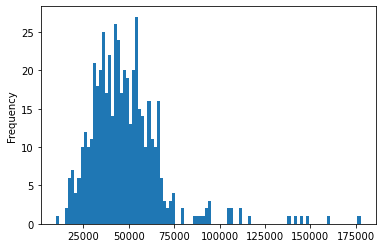

In [27]:
# histogram
FARA_no1020_CC_Chi[FARA_no1020_CC_Chi['LowIncomeTracts'] == 1]['MedianFamilyIncome'].plot.hist(bins=100)